<a href="https://colab.research.google.com/github/Emiliewu/datascience-assignments/blob/main/week3_day2_regression_plots_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Plots
##When to Use?
Regression plots should be used when you are comparing:

* Numeric feature (X)
* vs. a Numeric target (y)


## Plotting numeric features vs numeric targe
As we visualize the relationships between our features and the target, we need a type of chart that will allow us to plot numeric X columns vs. a numeric y. You've already seen a very simple plot for plotting 2 numeric features: the scatter plot.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

In [3]:
fname = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/ames-housing-cleaned-eda.csv'
df = pd.read_csv(fname)
df = df.set_index('PID')
df.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60,7200,Pave,MISSING,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
527108010,RL,134,19378,Pave,MISSING,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,MISSING,320000.0,3,2006,3.0,1.0
534275170,RL,-1,12772,Pave,MISSING,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,MISSING,151500.0,4,2007,1.0,0.0
528104050,RL,114,14803,Pave,MISSING,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,MISSING,385000.0,6,2008,3.0,0.0
533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,MISSING,193800.0,2,2007,3.0,0.0


#Scatter Plots with Pandas
Let's make a scatterplot with the Living Area Sqft on the x-axis and the Sale Price on the y-axis.

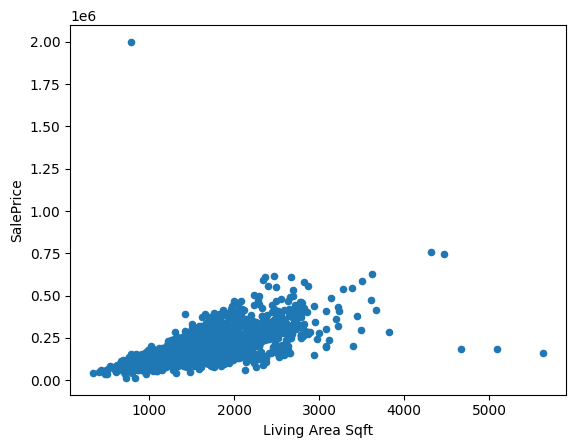

In [4]:
# with pandas
ax = df.plot(kind='scatter', x='Living Area Sqft', y='SalePrice');

#Scatter Plot with Matplotlib

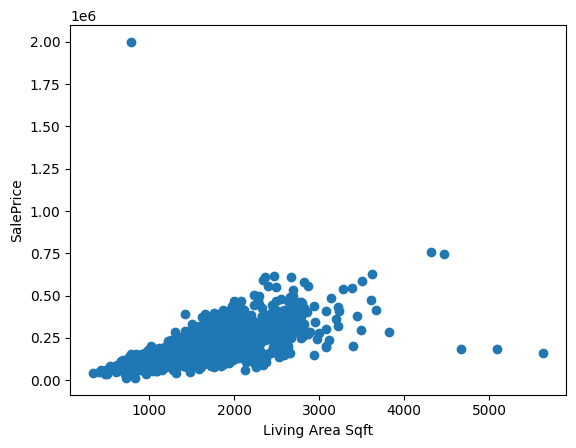

In [5]:
#with Matplotlib
fig, ax = plt.subplots()
ax.scatter(df['Living Area Sqft'], df['SalePrice']);
ax.set(xlabel='Living Area Sqft', ylabel='SalePrice');

Scatter Plots with Seaborn
Seaborn's sns.scatterplot will do some additional customization, such as adding white edges for visibility. With Seaborn you do not need to include additional code for the x and y labels.

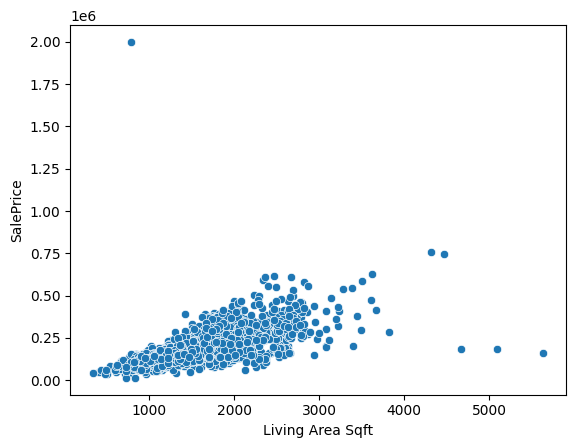

In [6]:
sns.scatterplot(data=df, x='Living Area Sqft', y='SalePrice')
plt.show()

## Visualizing the Trend between X and y
We can see the Living Area Sqft on the X-axis and the Sale Price on the y-axis. It looks like as we increase the value of X (move right along the x-axis), the value for Y seems to increase. There are several markers that don't follow this trend perfectly.

We want to visually summarize the overall relationship between the x and y. The easiest way to do so is to use seaborn's sns.regplot function.

The regplot is very helpful, as it will:

* 1. Create a scatter plot with Matplotlib
* 2. Calculate a line of best fit using another package (either statsmodels or SciPy, depending),.
* 3. Finally, it will plot the trend line usig Matplotlib.

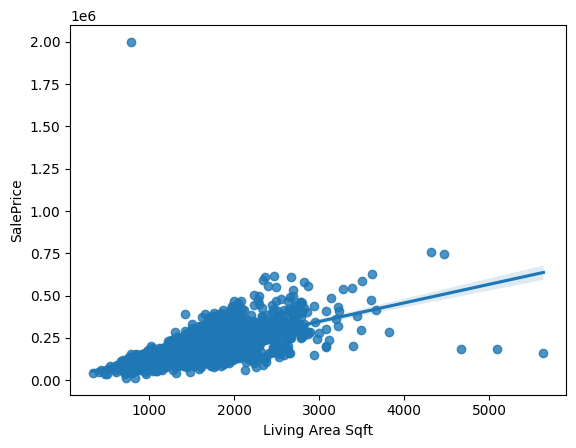

In [7]:
# sns.regplot requires the same arguments as scatterplot
ax = sns.regplot(data=df, x='Living Area Sqft', y='SalePrice');

The regplot added a line of best fit, but right now it's difficult to see because the default color for the regression line is the same as the markers.

In addition, the markers lost their white background which made it harder to see overlapping markers.

## Customizing Seaborn Plots with keyword dictionaries
Though we don't see it, Seaborn's regplot is using 2 different Matplotlib plotting functions to create the regplot:

* plt.scatter: to plot the markers
* plt.plot: to plot the trendline


If we check the documentation, we will see that regplot accepts 2 additional parameters (scatter_kws, and line_kws) that allow us to control any of the arguments used by passing additional arguments to Matplotlib. We have to address the customizations for the line and the markers separately.

### Customizing the line

To customize the line, we create a dictionary of the desired line customizations. In this case, we are changing the color of the line to black. We then use this dictionary along with the line_kws argument.

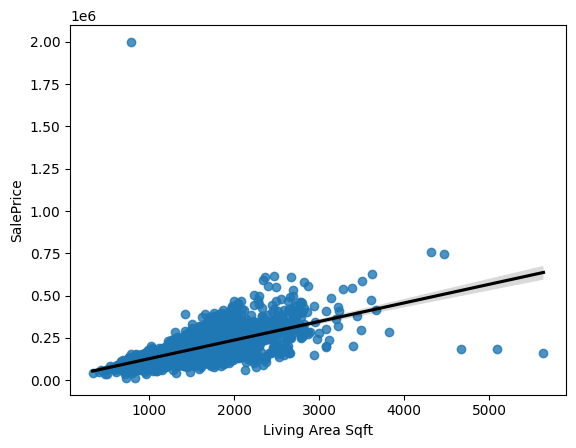

In [8]:
# Saving the arguments for the line color in a dict to to use as line_kws
line_kws = dict(color='black')
ax = sns.regplot(data=df, x='Living Area Sqft', y='SalePrice', line_kws=line_kws)

#### Customizing the markers

To customize the markers, we create a separate dictionary for desired marker customizations. In this case, we want to add a white edge to the scatter plot markers. We then use this dictionary along with the scatter_kws argument.

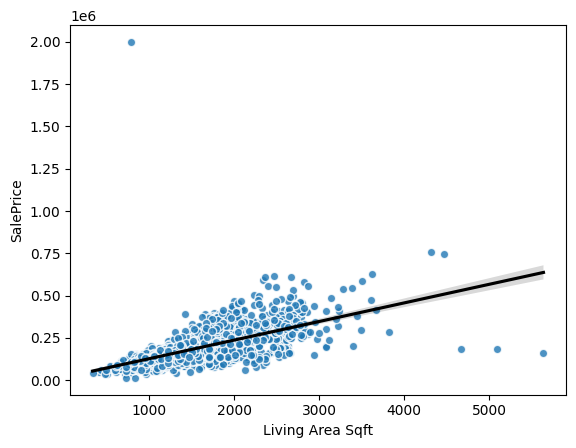

In [10]:
# Saving the arguments for the markers' edge color in a dict to to use as scatter_kws
scatter_kws = dict(edgecolor='white')
ax = sns.regplot(data=df, x='Living Area Sqft', y='SalePrice', line_kws=line_kws, scatter_kws=scatter_kws);

Now that we can see our trend line more clearly. It is showing an increasing slope between Living Area Sqft and Sale Price. As Living Area Sqft increases, so does SalePrice. This is a positive correlation.

## Grouped Regression Plots (using hue)
What if we wanted to visualize the relationship between salesprice and living area, but grouped by if the home has central air?

For scatterplot, we can just add hue='Central Air'

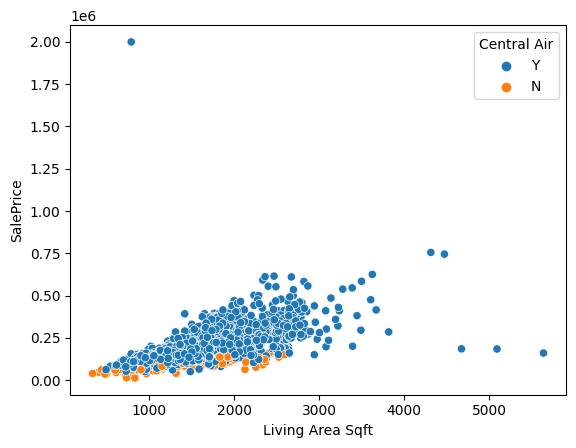

In [11]:
# Creating a scatterplot using Central Air as the hue argument
ax = sns.scatterplot(data=df, x='Living Area Sqft', y='SalePrice', hue='Central Air');

You can see the homes with central air in blue, while the homes without are in orange.


The hue argument works so easily with sns.scatterplot, we would expect the regplot to also accept a hue argument, but it does not!

Instead, there is a more advanced plot, that will allow us to display trendlines for groups.

**The More Advanced Regression Plot: the Linear Model Plot**

There is a second class of Seaborn plots that are more complex than the normal Matplotlib plots that we have used so far. So far we have only used Seaborn plots that return a simple Matplotlib Axes. The more advanced type of seaborn plots return a special Seaborn object called a FacetGrid, instead of a Matpotlib Axes.

## Using sns.lmplot
Let's apply the advanced form of the regplot the linear model plot (sns.lmplot)

Let's plot the "Living Area Sqft" vs. "SalePrice" again, but let's add hue='Central Air'. For now, we will also remove the line_kws/scatter_kws to see the unaltered results of lmplot. We will save the plot as "g" for to represent that it is a grid, or technically a FacetGrid.

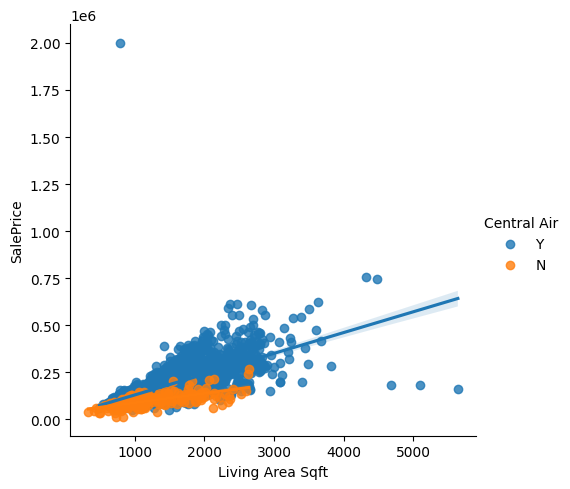

In [12]:
# Use sns.lmplot and save as g
g= sns.lmplot(data=df, x='Living Area Sqft', y='SalePrice', hue='Central Air');

The lmplot was able to calculate two separate trendlines for us.

It used the same color for the markers and lines for each group.

It is still difficult to see, however, so we will add back the white edges around our markers using scatter_kws

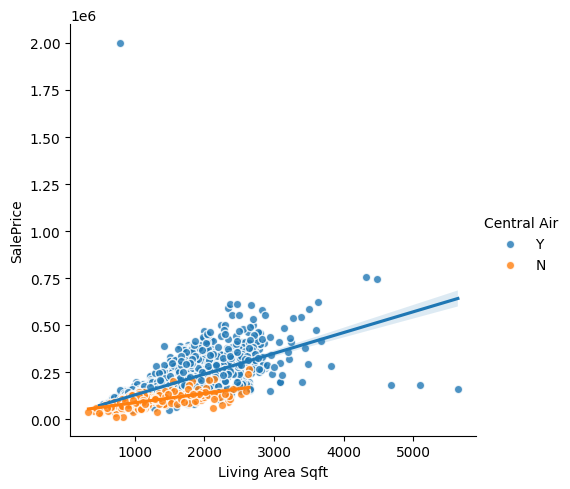

In [13]:
g = sns.lmplot(data=df, x='Living Area Sqft', y='SalePrice', scatter_kws=scatter_kws, hue='Central Air');

Unlike our other plots, our output is not an axes. Let's verify the type of object:

In [14]:
# what is the output of the lmplot
type(g)

seaborn.axisgrid.FacetGrid

As you can see it is a FacetGrid. Note that when we have a FacetGrid, the customization does not work the same as it does with an axes object.
For example, if we try to add a title using the same method as before, we will get an error:

The good news is that the FacetGrid actually contains the Axes, which is stored under the grid.ax
This means we can still use the ax customizations, but must first put the variable of the facegrid in front of ax. In this case, we will use g.ax.

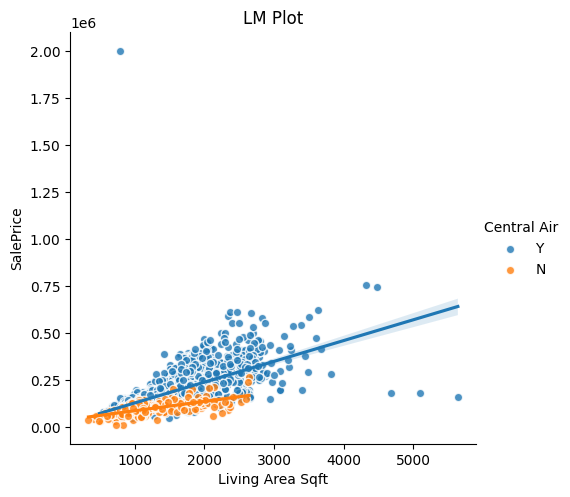

In [15]:
# Set the title using g.ax.set_title()
g = sns.lmplot(data=df, x='Living Area Sqft', y='SalePrice', scatter_kws=scatter_kws, hue='Central Air');
g.ax.set_title('LM Plot');